In [315]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

Histogram

In [317]:
year=df['2008']

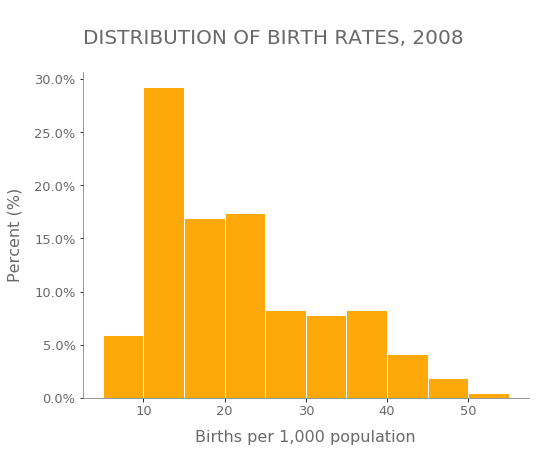

In [323]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('w')
bins_list = [5,10,15,20,25,30,35,40,45,50,55]
plt.hist(year, weights=np.ones(len(year)) / len(year),bins = bins_list, facecolor='orange', alpha=10, edgecolor='white')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
ax.set_title('\nDISTRIBUTION OF BIRTH RATES, 2008\n', fontsize=20,  loc='left', color = 'dimgray')
ax.set_ylabel('Percent (%)', fontsize=16, labelpad=12, color = 'dimgray')
ax.set_xlabel('Births per 1,000 population', fontsize=16, labelpad=12, color = 'dimgray')
ax.grid(False)
#ax.yaxis.grid(color='gray', linewidth=0.2)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
right_side = ax. spines["right"]
right_side.set_visible(False) 
top_side = ax. spines["top"]
top_side.set_visible(False) 
ax.tick_params(axis='x', labelsize=13) 
ax.tick_params(axis='y', labelsize=13) 
plt.setp(ax.get_xticklabels(), color="dimgray")
plt.setp(ax.get_yticklabels(), color="dimgray")
plt.show();

Box plot

In [146]:
#boxplot
df1 = pd.read_csv('crimeratesbystate-formatted.csv')
df1 = df1.drop(['murder', 'forcible_rape', 'aggravated_assault', 'larceny_theft', 'motor_vehicle_theft'], axis=1)
df1.head()

,state,robbery,burglary
0,United States,140.7,726.7
1,Alabama,141.4,953.8
2,Alaska,80.9,622.5
3,Arizona,144.4,948.4
4,Arkansas,91.1,1084.6


In [147]:
df1 = pd.melt(df1, id_vars=['state'], value_vars=['burglary', 'robbery'])
df1.head()

,state,variable,value
0,United States,burglary,726.7
1,Alabama,burglary,953.8
2,Alaska,burglary,622.5
3,Arizona,burglary,948.4
4,Arkansas,burglary,1084.6


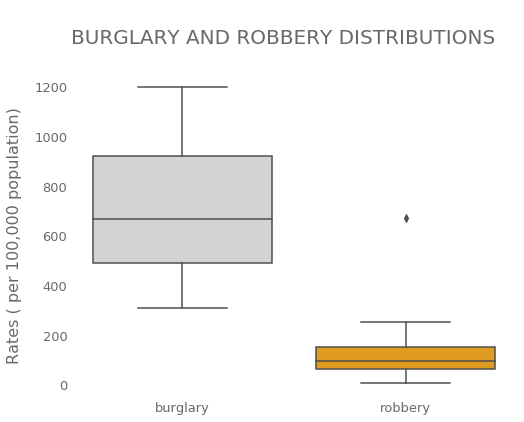

In [158]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('w')
my_pal = {"burglary": "lightgray", "robbery": "orange"}
ax = sns.boxplot(x="variable", y="value", data=df1, palette=my_pal)
right_side = ax. spines["right"]
right_side.set_visible(False) 
top_side = ax. spines["top"]
top_side.set_visible(False) 
left_side = ax. spines["left"]
left_side.set_visible(False) 
bottom_side = ax. spines["bottom"]
bottom_side.set_visible(False) 
ax.set_title('\nBURGLARY AND ROBBERY DISTRIBUTIONS\n', fontsize=20,  loc='left', color = 'dimgray')
ax.set_ylabel('Rates ( per 100,000 population)', fontsize=16, labelpad=12, color = 'dimgray')
ax.set_xlabel('', fontsize=16, labelpad=12, color = 'dimgray')
ax.grid(False)
ax.tick_params(axis='x', labelsize=13) 
ax.tick_params(axis='y', labelsize=13) 
plt.setp(ax.get_xticklabels(), color="dimgray")
plt.setp(ax.get_yticklabels(), color="dimgray")
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.show();

Bullet Chart

In [159]:
df2 = pd.read_excel('sales_devices.xlsx')
df2.head()

,devices,month,expected_sales,actual_sales
0,printer,1,32,30
1,camera,1,25,34
2,alarm clock,1,30,25
3,printer,2,35,33
4,camera,2,30,21


In [160]:
df2new = df2[df2['devices']=='printer']
df2new.head()

,devices,month,expected_sales,actual_sales
0,printer,1,32,30
3,printer,2,35,33
6,printer,3,35,30
9,printer,4,34,30
12,printer,5,34,30


In [180]:
df3new = df2[df2['devices']=='camera']
df3new.head()

,devices,month,expected_sales,actual_sales
1,camera,1,25,34
4,camera,2,30,21
7,camera,3,35,31
10,camera,4,37,38
13,camera,5,40,45


In [184]:
df4new = df2[df2['devices']=='alarm clock']
df4new.head()

,devices,month,expected_sales,actual_sales
2,alarm clock,1,30,25
5,alarm clock,2,35,29
8,alarm clock,3,40,33
11,alarm clock,4,35,30
14,alarm clock,5,33,30


In [176]:
import plotly
from plotly import tools
import plotly.graph_objects as go

In [208]:

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+gauge+delta", value = sum(df4new['actual_sales']),
    delta = {'reference': sum(df4new['expected_sales'])},
    domain = {'x': [0.25, 1], 'y': [0.7, 0.9]},
    title = {'text': "alarm clock sales"},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 500]},
        'threshold': {
            'line': {'color': "black", 'width': 2},
            'thickness': 0.75,
            'value': sum(df4new['expected_sales'])},
        'steps': [
            {'range': [0, sum(df4new['actual_sales'])*60*0.01], 'color': "gray"},
            {'range': [sum(df4new['actual_sales'])*60*0.01, sum(df4new['actual_sales'])*80*0.01], 'color': "lightgray"}],
        'bar': {'color': "orange"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge+delta", value = sum(df3new['actual_sales']),
    delta = {'reference': sum(df3new['expected_sales'])},
    domain = {'x': [0.25, 1], 'y': [0.4, 0.6]},
    title = {'text': "camera sales"},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 500]},
        'threshold': {
            'line': {'color': "black", 'width': 2},
            'thickness': 0.75,
            'value': sum(df3new['expected_sales'])},
        'steps': [
            {'range': [0, sum(df3new['actual_sales'])*60*0.01], 'color': "gray"},
            {'range': [sum(df3new['actual_sales'])*60*0.01, sum(df3new['actual_sales'])*80*0.01], 'color': "lightgray"}],
        'bar': {'color': "orange"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge+delta", value = sum(df2new['actual_sales']),
    delta = {'reference': sum(df2new['expected_sales'])},
    domain = {'x': [0.25, 1], 'y': [0.08, 0.25]},
    title = {'text': "printer sales"},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 500]},
        'threshold': {
            'line': {'color': "black", 'width': 2},
            'thickness': 0.75,
            'value': sum(df2new['expected_sales'])},
        'steps': [
            {'range': [0, sum(df2new['actual_sales'])*60*0.01], 'color': "gray"},
            {'range': [sum(df2new['actual_sales'])*60*0.01, sum(df2new['actual_sales'])*80*0.01], 'color': "lightgray"}],
        'bar': {'color': "orange"}}))
fig.update_layout(
    title="ACTUAL VS EXPECTED DEVICE SALES",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="dimgray"
    )
)


fig.show()

Radar Chart

In [350]:
import plotly.express as px
df4 = pd.read_csv('crimeratesbystate-formatted.csv')
df4.head()

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1


In [351]:
df4.state.unique()

array(['United States ', 'Alabama ', 'Alaska ', 'Arizona ', 'Arkansas',
       'California ', 'Colorado ', 'Connecticut ', 'Delaware ',
       'District of Columbia', 'Florida ', 'Georgia ', 'Hawaii ',
       'Idaho ', 'Illinois ', 'Indiana ', 'Iowa ', 'Kansas  ',
       'Kentucky  ', 'Louisiana ', 'Maine ', 'Maryland ', 'Massachusetts',
       'Michigan', 'Minnesota ', 'Mississippi ', 'Missouri ', 'Montana  ',
       'Nebraska ', 'Nevada ', 'New Hampshire ', 'New Jersey',
       'New Mexico ', 'New York', 'North Carolina ', 'North Dakota ',
       'Ohio ', 'Oklahoma ', 'Oregon ', 'Pennsylvania', 'Rhode Island ',
       'South Carolina ', 'South Dakota ', 'Tennessee ', 'Texas ', 'Utah',
       'Vermont ', 'Virginia ', 'Washington ', 'West Virginia ',
       'Wisconsin ', 'Wyoming '], dtype=object)

In [352]:
df4=df4[df4['state']=='United States ']

In [353]:
df4

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7


In [354]:
df4 = pd.DataFrame(data=df4)
df4

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7


In [355]:
df4.columns

Index(['state', 'murder', 'forcible_rape', 'robbery', 'aggravated_assault',
       'burglary', 'larceny_theft', 'motor_vehicle_theft'],
      dtype='object')

In [356]:
df4= df4[[ 'murder', 'robbery', 'aggravated_assault',
       'burglary', 'larceny_theft', 'motor_vehicle_theft']]

In [357]:
df4

,murder,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft
0,5.6,140.7,291.1,726.7,2286.3,416.7


In [358]:
df5 = df4.rename(columns={"aggravated_assault": "aggravated assault", "larceny_theft": "larceny theft", 'motor_vehicle_theft': 'motor vehicle theft'})

In [359]:
df5

,murder,robbery,aggravated assault,burglary,larceny theft,motor vehicle theft
0,5.6,140.7,291.1,726.7,2286.3,416.7


In [347]:
import plotly.express as px

In [361]:
fig = px.line_polar(
                    r=df5.loc[0].values,
                    theta=df5.columns,

                    line_close=True)

fig.update_traces(fill='toself')
fig.update_layout(
    title="CRIME IN THE UNITED STATES\n\n",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="dimgray"
    )
)
fig.show()

